In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# dataset link : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

df = pd.read_csv('/content/online_shoppers_intention.csv')
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1390,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
6001,1,21.200000,0,0.0,12,249.409524,0.015385,0.019231,0.000000,0.0,Oct,2,2,8,2,Returning_Visitor,True,False
979,11,247.333333,2,369.0,90,7221.000000,0.001031,0.003918,13.464063,0.0,Mar,2,2,3,8,Returning_Visitor,False,True
9997,0,0.000000,0,0.0,4,185.000000,0.050000,0.100000,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
11288,0,0.000000,0,0.0,9,205.500000,0.000000,0.004444,0.000000,0.0,Nov,8,1,1,3,Returning_Visitor,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [ ]:
# converting categorical value into numeric values

# One-Hot Encode 'VisitorType' and 'Month'
df = pd.get_dummies(df, columns=['VisitorType', 'Month'], drop_first=True)

# Converting 'Weekend' and 'Revenue' to integer
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False


In [ ]:
# finding the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the target variable
numerical_columns = numerical_columns.drop(['Revenue'])

# Initializing the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
1862,0.000000,0.000000,0.0,0.0,0.009929,0.003637,0.000000,0.071429,0.000000,0.0,...,True,False,False,False,False,True,False,False,False,False
5292,0.000000,0.000000,0.0,0.0,0.011348,0.001735,0.500000,0.625000,0.000000,0.8,...,True,False,False,False,False,False,True,False,False,False
1821,0.000000,0.000000,0.0,0.0,0.002837,0.000078,0.000000,0.500000,0.000000,0.0,...,True,False,False,False,False,True,False,False,False,False
5355,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,...,True,False,False,False,False,False,True,False,False,False
7001,0.000000,0.000000,0.0,0.0,0.007092,0.002142,0.000000,0.200000,0.000000,0.0,...,True,False,False,False,False,False,False,False,True,False
7148,0.037037,0.031276,0.0,0.0,0.045390,0.036439,0.156250,0.244792,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,False
4007,0.111111,0.014123,0.0,0.0,0.058156,0.007921,0.022222,0.069841,0.028984,0.0,...,True,False,False,False,False,False,True,False,False,False
9699,0.000000,0.000000,0.0,0.0,0.012766,0.006675,0.000000,0.125000,0.036258,0.0,...,False,True,False,False,False,False,False,False,False,False
2175,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,...,True,False,False,False,False,False,True,False,False,False
1713,0.000000,0.000000,0.0,0.0,0.007092,0.002819,0.100000,0.100000,0.000000,0.0,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
df['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


In [ ]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,...,-0.022884,-0.014443,-0.065649,0.006221,-0.001902,-0.055036,-0.064587,0.051574,0.091266,0.059607
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,...,-0.022525,-0.004990,-0.044524,-0.002096,-0.018974,-0.023198,-0.039318,0.032432,0.055101,0.031313
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,...,0.057399,0.002822,-0.040372,0.001896,0.007176,-0.027957,-0.038422,0.063754,-0.002619,0.009692
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,...,0.045501,0.010314,-0.028060,0.014958,-0.015407,-0.011545,-0.031811,0.036899,0.006434,0.001744
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,...,0.128738,-0.033909,-0.056863,0.020034,0.015072,-0.114672,-0.072220,0.182339,0.008907,0.005997
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,...,0.120489,-0.017563,-0.046550,0.002276,0.001506,-0.085491,-0.068133,0.166951,-0.008773,0.005950
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,...,0.129908,-0.016999,0.063030,0.009766,0.041178,-0.004090,0.059062,-0.034281,-0.046044,-0.040081
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,...,0.171987,-0.014700,0.078709,0.008852,0.048276,0.013439,0.072815,-0.056810,-0.062465,-0.050956
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,...,-0.115825,0.020518,-0.033137,-0.018317,-0.020804,-0.044451,-0.015099,0.037856,0.032046,0.017439
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,...,0.087123,-0.124635,0.106596,-0.058845,-0.047759,-0.132095,0.464809,-0.175039,-0.066666,-0.059966


In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_Other', 'VisitorType_Returning_Visitor',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

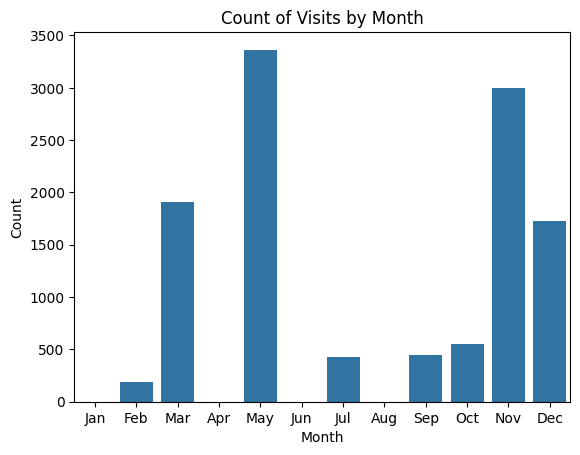

In [ ]:
# count plot for Months

# Sum each month column to get the count of occurrences
month_counts = df[['Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
                   'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']].sum()

# Prepare the data for plotting
month_counts.index = [month.split('_')[1] for month in month_counts.index]  # Get only the month names
month_counts = month_counts.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fill_value=0)  # Ensure all months are listed

# Plotting
sns.barplot(x=month_counts.index, y=month_counts.values)
plot.title('Count of Visits by Month')
plot.xlabel('Month')
plot.ylabel('Count')
plot.show()


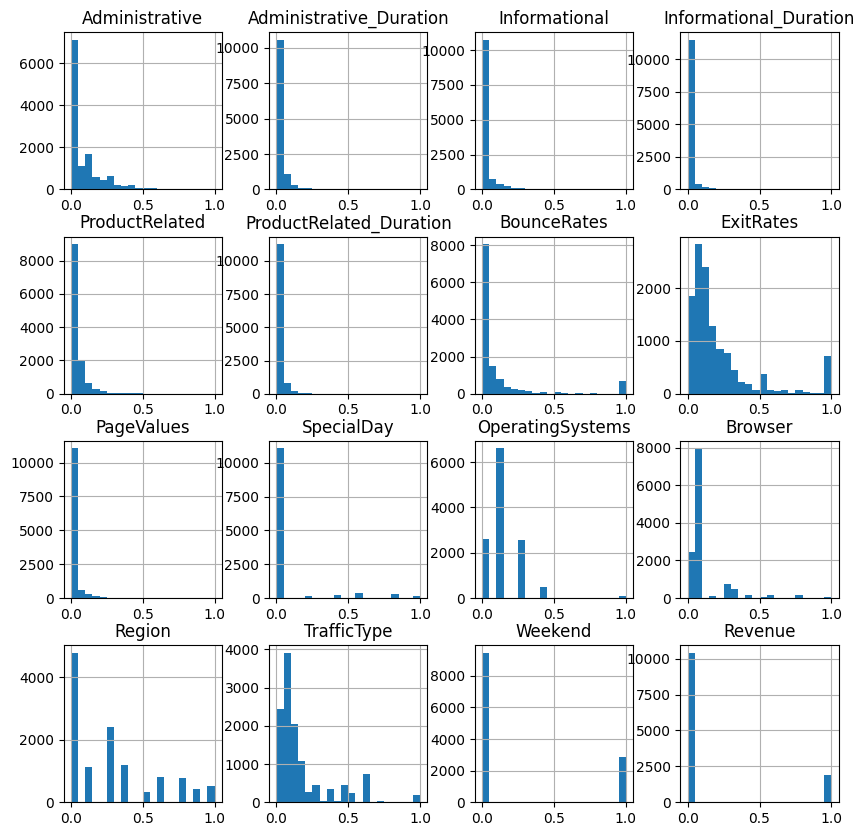

In [ ]:
# Histogram of columns

df.hist(bins=20,figsize=(10,10))
plot.show()

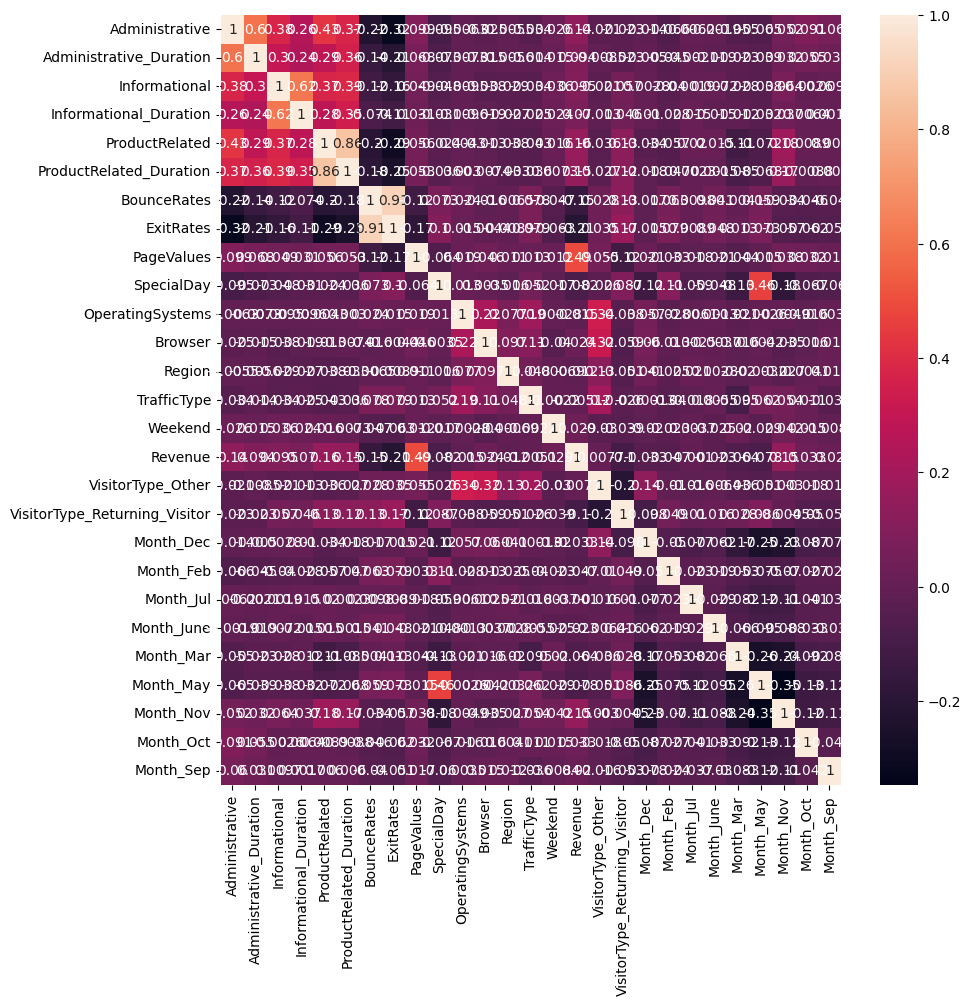

In [ ]:
# Correlation analysis

corrmat=df.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(10,10))

#plot heat map

g = sns.heatmap(df[top_corr_features].corr(), annot=True)

In [ ]:
# Target and feature separation
target_name = 'Revenue'
y = df[target_name]
x = df.drop(target_name, axis=1)

In [ ]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False


In [ ]:
y.head()

,Revenue
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=1)

Classification Algorithm

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Model Evaluation
train_accuracy = rf.score(x_train, y_train) * 100
test_accuracy = rf.score(x_test, y_test) * 100

print("Train Accuracy of Random Forest:", train_accuracy)
print("Test Accuracy of Random Forest:", test_accuracy)

Train Accuracy of Random Forest: 100.0
Test Accuracy of Random Forest: 90.20681265206812


In [ ]:
y_pred = rf.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8364
           1       0.73      0.56      0.64      1500

    accuracy                           0.90      9864
   macro avg       0.83      0.76      0.79      9864
weighted avg       0.90      0.90      0.90      9864


Confusion Matrix:
 [[8056  308]
 [ 658  842]]
